<a href="https://colab.research.google.com/github/AdrianaJazmin99/fs-plus-2023-c9/blob/main/SEGUNDO_PARCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

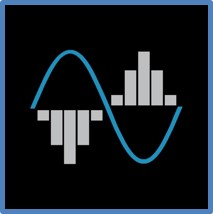
# **ANÁLISIS DE SEÑALES Y SISTEMAS (ASyS)**
## **SEGUNDO PARCIAL - PARTE 1 (GRUPAL)**


**CONDICIONES DE DESARROLLO Y APROBACIÓN**

Se trabajará **GRUPALMENTE**, en virtud de las consignas que se detallan a continuación:
*   El **avance preliminar** de los requerimientos de este módulo deberá presentar dentro de las dos semanas previas a la fecha del SEGUNDO PARCIAL **(ver cronograma de clases)**
*   Se deberá completar un **60% DE LOS CONTENIDOS** para su aprobación
*   El aporte **TOTAL** a la nota final del exámen es de **5 PUNTOS**
*   El puntaje restante se obtendrá de la **defensa ORAL** del mismo por parte de los integrantes del grupo (PARTE II), de no más de **10 min.** de duración)

**COMPARTIR COLAB A: asysfrbati@gmail.com**

**ENTREGA DEL EXÁMEN: El RESPONSABLE DEL GRUPO deberá subir una impresión en PDF a la tarea correspondiente en el campus**

### **GRUPO DE TRABAJO:** *02*

### **INTEGRANTES:**
1.   Adriana Ayala
2.   Adriana Yrcañaupa
3.   Julian Galeano Pinazo


REFERENCIAS:

[Manual Python 3](https://docs.python.org/es/3/tutorial/appetite.html)

[Google Colaboratory](https://colab.research.google.com)

[Manual NumPy](https://numpy.org/doc/stable/user/index.html#user)

[Manual Matplotlib](https://matplotlib.org/stable/index.html)

[Manual Math](https://docs.python.org/3/library/math.html)

### **MÓDULOS DE USO GENERAL EN PYTHON**


In [2]:
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.6 MB/s eta 0:00:00


In [3]:
#Módulo NUMPY (Permite realizar operaciones matemáticas)
import numpy as np

#Módulo MATPLOTLIB (Permite implementar visualización gráfica)
import matplotlib.pyplot as plt

#Módulo MATH (Permite realizar operaciones matemáticas complementarias a numpy)
import math as mt

#Módulo SCIPY (Permite realizar el procesamiento de señales)
import scipy.signal as sp
import scipy.stats as sps

# Biblioteca para acceder a funciones específicas del sistema operativo
import os

# Biblioteca para manipular rutas de archivo y directorio
import shutil

# Biblioteca para trabajar con rutas POSIX
import posixpath

# Biblioteca para trabajar con señales biomédicas en formato PhysioNet
import wfdb

# Biblioteca para trabajar con datos tabulares
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **TOOLBOX ASyS**

In [4]:
#Definición de la función IMPULSO UNITARIO APROXIMADO delta(t)
delta = lambda t,Ts: np.piecewise(t, t==0, [1/Ts,0])

#Definición de la función ESCALÓN UNITARIO u(t)
u = lambda t: np.piecewise(t, t>=0, [1,0])

#Definición de la función RAMPA UNITARIA rho(t)
rho = lambda t: t*u(t)

#Función ENERGIA
def ENERGIA(x, dt=1):
    '''
    x: signal
    dt: time-step used to define the signal x.
        Default value: dt = 1
    '''
    return np.sum(np.abs(x)**2)*dt

#Función POTENCIA
def POTENCIA(x, T0, dt=1):
    '''
    x: a period (ONLY ONE) of the signal
    T0: signal period
    dt: time-step used to define the signal x.
        Default value: dt = 1
    '''
    return 1/T0 * np.sum(np.abs(x)**2)*dt

##**MARCO DE TRABAJO**##

##Esta actividad tiene como objetivo el de **interactuar con señales provenientes de entornos reales**, de modo de llevar a cabo un análisis de las mismas y de los **sistemas que podrían estar ligados a ellas**. Para ello, se solicita cumplir con los requerimientos que a continuación se detallan:##

**1) SELECCIÓN DE UNA FUENTE DE SEÑAL**

Seleccionar una fuente de datos con la que desee trabajar. Las bases de datos públicas pueden proporcionar dicha información según la disciplina. Eventualmente se podrá trabajar con señales obtenidas de fuentes alternativas, que pueden implicar mediciones propias o generadas por algún grupo de trabajo. Algunas de las bases de datos que pueden consultarse son:

* [Señales de la Fisiología Humana](https://physionet.org/)
* [Datos Publicos del Gobierno de la Ciudad](https://data.buenosaires.gob.ar/dataset)
* [Señales de Audio Vocal](https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06)
* [Series Temporales Varias](https://github.com/awesomedata/awesome-public-datasets#timeseries)
* [Base de Datos NASA](https://data.nasa.gov/browse)
* [Base de Datos Meteorológica](https://datosclima.es/)

**Eventualmente, podrán utilizarse señales de otras fuentes que se consideren interesantes o generar series propias**

Una vez seleccionada la fuente de datos, deberán identificarse **al menos** 10 series temporales distintas del mismo tipo de dato (Ej. Fluctuación de la temperatura de una zona específica del país durante un año (hora a hora), en 10 años distintos)    

https://drive.google.com/drive/folders/1u_Zd4-DIPYh3Q57gR6N_ATHWoNiBg6s4?usp=drive_link

**2) ANÁLISIS PRELIMINAR** (0,5 PUNTOS)

*  Graficar (adecuadamente) 3 (tres) de las series temporales seleccionadas, describiendo brevemente su naturaleza e indicando su finalidad/utilidad



* ¿Dichas series pueden considerarse de naturaleza estocástica? (Justificar la respuesta)

Las series son de naturaleza estocastica, se observan irregularidades a lo largo de cada curva, es mucho mas eviddente entre las señales 4 y 8.

* ¿Se podría construir un **ENSAMBLE** representaivo del proceso que las generó a partir de ellas?

Se puede establecer un ensamblre representativo, si bien son señales estocasticas que presentan cierto desfasaje temporal, se observa que tienen mucha similaridad en freciencia, amplitud y periodo.

In [ ]:
#1
# Convert records to dataframes
Ts=0.001
timelapse=20
channel=[8]

record1 = wfdb.rdrecord('drive/MyDrive/señales/s0030DC', sampfrom=12112, sampto=int(12112+timelapse/Ts), channels=channel)
record2 = wfdb.rdrecord('drive/MyDrive/señales/s0044DC', sampfrom=4085, sampto=int(4085+timelapse/Ts), channels=channel)
record3 = wfdb.rdrecord('drive/MyDrive/señales/s0063DC', sampfrom=17868, sampto=int(17868+timelapse/Ts), channels=channel)
record4 = wfdb.rdrecord('drive/MyDrive/señales/s0070DC', sampfrom=26450, sampto=int(26450+timelapse/Ts), channels=channel)
record5 = wfdb.rdrecord('drive/MyDrive/señales/s0073DC', sampfrom=15980, sampto=int(15980+timelapse/Ts), channels=channel)
record6 = wfdb.rdrecord('drive/MyDrive/señales/s0076DC', sampfrom=11950, sampto=int(11950+timelapse/Ts), channels=channel)
record7 = wfdb.rdrecord('drive/MyDrive/señales/s0078DC', sampfrom=54, sampto=int(54+timelapse/Ts), channels=channel)
record8 = wfdb.rdrecord('drive/MyDrive/señales/s0082DC', sampfrom=5200, sampto=int(5200+timelapse/Ts), channels=channel)
record9 = wfdb.rdrecord('drive/MyDrive/señales/s0084DC', sampfrom=3100, sampto=int(3100+timelapse/Ts), channels=channel)
record10 = wfdb.rdrecord('drive/MyDrive/señales/s0085DC', sampfrom=3212, sampto=int(3212+timelapse/Ts), channels=channel)

signal1, fields = record1.p_signal[:,0], record1.__dict__
signal2, fields = record2.p_signal[:,0], record2.__dict__
signal3, fields = record3.p_signal[:,0], record3.__dict__
signal4, fields = record4.p_signal[:,0], record4.__dict__
signal5, fields = record5.p_signal[:,0], record5.__dict__
signal6, fields = record6.p_signal[:,0], record1.__dict__
signal7, fields = record7.p_signal[:,0], record2.__dict__
signal8, fields = record8.p_signal[:,0], record3.__dict__
signal9, fields = record9.p_signal[:,0], record4.__dict__
signal10, fields = record10.p_signal[:,0], record5.__dict__

In [14]:
#No borrar

#1
# Convert records to dataframes
Ts=0.001
timelapse=20
channel=[8]

record1 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0030DC', sampto=int(timelapse / Ts), channels=channel)
record2 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0044DC', sampto=int(timelapse / Ts), channels=channel)
record3 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0063DC', sampto=int(timelapse / Ts), channels=channel)
record4 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0070DC', sampto=int(timelapse / Ts), channels=channel)
record5 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0073DC', sampto=int(timelapse / Ts), channels=channel)
record6 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0076DC', sampto=int(timelapse / Ts), channels=channel)
record7 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0078DC', sampto=int(timelapse / Ts), channels=channel)
record8 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0082DC', sampto=int(timelapse / Ts), channels=channel)
record9 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0084DC', sampto=int(timelapse / Ts), channels=channel)
record10 = wfdb.rdrecord('drive/MyDrive/ASYS-TPs/Segundo parcial/Señales/Sit-to-stand/s0085DC', sampto=int(timelapse / Ts), channels=channel)

signal1, fields = record1.p_signal[:,0], record1.__dict__
signal2, fields = record2.p_signal[:,0], record2.__dict__
signal3, fields = record3.p_signal[:,0], record3.__dict__
signal4, fields = record4.p_signal[:,0], record4.__dict__
signal5, fields = record5.p_signal[:,0], record5.__dict__
signal6, fields = record6.p_signal[:,0], record1.__dict__
signal7, fields = record7.p_signal[:,0], record2.__dict__
signal8, fields = record8.p_signal[:,0], record3.__dict__
signal9, fields = record9.p_signal[:,0], record4.__dict__
signal10, fields = record10.p_signal[:,0], record5.__dict__


1: 12112 , 2: 4085 , 3: 8868 , 4: 17568 , 5: 15980 , 6: 11575 , 7: 54 , 8: 4879 , 9: 3445 , 10: 3212


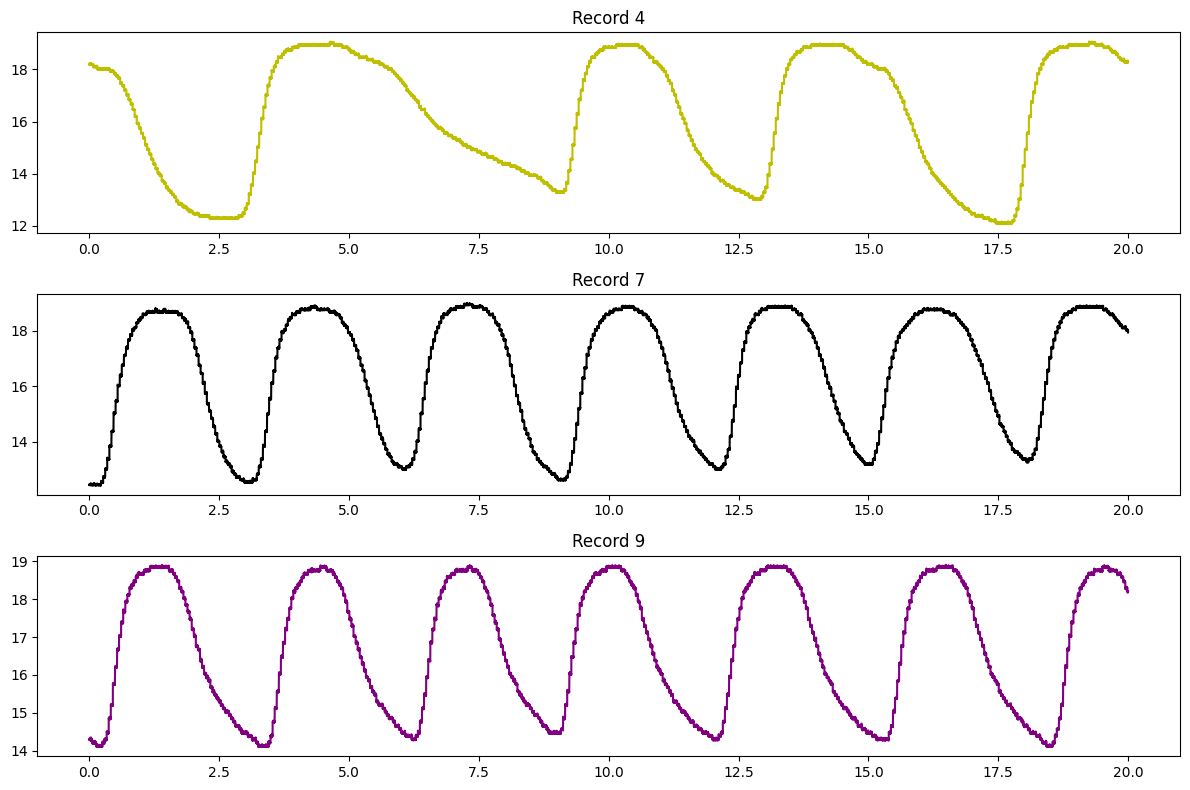

In [15]:
t=np.arange(0,timelapse,Ts)
plt.figure(figsize=(12, 8))

print('1:',signal1.argmin(),', 2:',signal2.argmin(),', 3:',signal3.argmin(),', 4:',signal4.argmin(),', 5:',signal5.argmin(),', 6:',signal6.argmin(),', 7:',signal7.argmin(),', 8:',signal8.argmin(),', 9:',signal9.argmin(),', 10:',signal10.argmin())


#plt.subplot(10,1,1)
#plt.plot(t, signal1, 'r')
#plt.title('Record 1')

#plt.subplot(10,1,2)
#plt.plot(t, signal2, 'g')
#plt.title('Record 2')

#plt.subplot(10,1,3)
#plt.plot(t, signal3, 'b')
#plt.title('Record 3')

#plt.subplot(10,1,4)
plt.subplot(3,1,1)
plt.plot(t, signal4, 'y')
plt.title('Record 4')

#plt.subplot(10,1,5)
#plt.plot(t, signal5, 'm')
#plt.title('Record 5')

#plt.subplot(10,1,6)
#plt.plot(t, signal6, 'c')
#plt.title('Record 6')

#plt.subplot(10,1,7)
plt.subplot(3,1,2)
plt.plot(t, signal7, 'k')
plt.title('Record 7')

#plt.subplot(10,1,8)
#plt.plot(t, signal8, 'brown')
#plt.title('Record 8')

#plt.subplot(10,1,9)
plt.subplot(3,1,3)
plt.plot(t, signal9, 'purple')
plt.title('Record 9')

#plt.subplot(10,1,10)
#plt.plot(t, signal10, 'grey')
#plt.title('Record 10')

plt.tight_layout()
plt.show()




**3) PROCESAMIENTO TEMPOAL - ESTADÍSTICA BÁSICA** (1,5 PUNTOS)

Efectuar un procesamiento básico de 3 (tres) de las series temporales seleccionadas:

*  Histograma de cada realización temporal, indicando características principales (Ej. media y desvío estándar, si aplica)
*  Diagrama de dispersión y coeficiente de correlación lineal entre dos realizaciones distintas ¿Qué se está evaluando?
*  Correlación cruzada entre dos realizaciones distintas ¿Qué diferencia hay con la operación anterior?
*  Autocorrelación de cada realización ¿Qué se está buscando con ello?


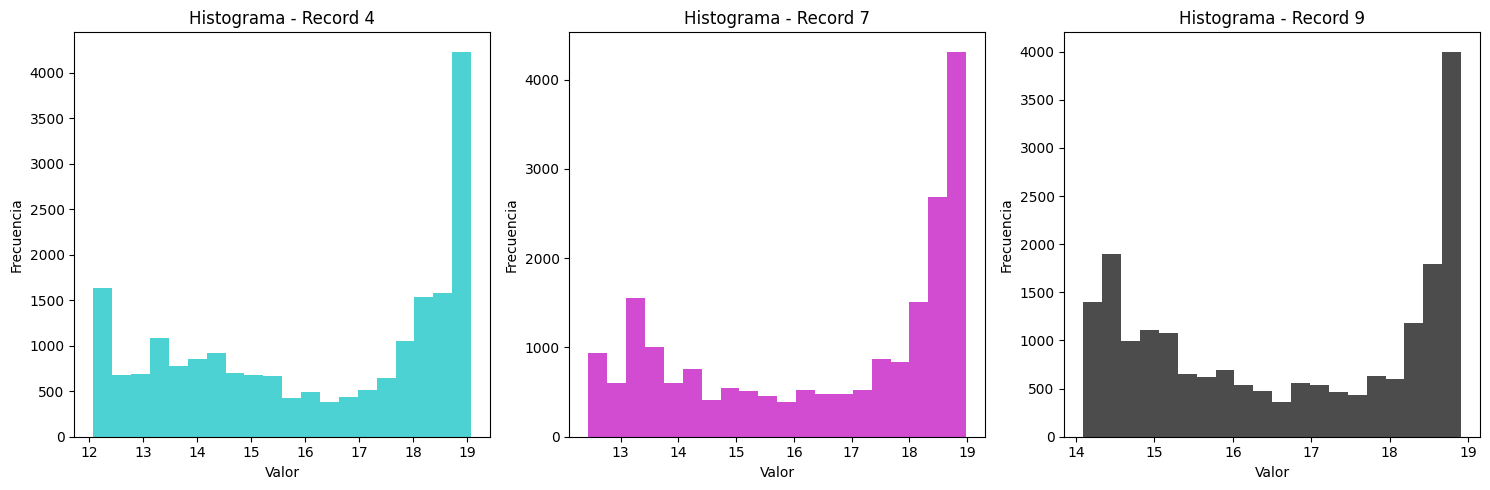

In [17]:
# Histograma de cada realización temporal
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(signal4, bins=20, color='c', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma - Record 4')

plt.subplot(132)
plt.hist(signal7, bins=20, color='m', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma - Record 7')

plt.subplot(133)
plt.hist(signal9, bins=20, color='k', alpha=0.7)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma - Record 9')

plt.tight_layout()
plt.show()


Coeficiente de correlación lineal (records 4 y 7): 0.23184755923407668
Significacion estadistica: 2.842332303526043e-242
Coeficiente de correlación lineal (records 7 y 9): 0.8938834829341193
Significacion estadistica: 0.0


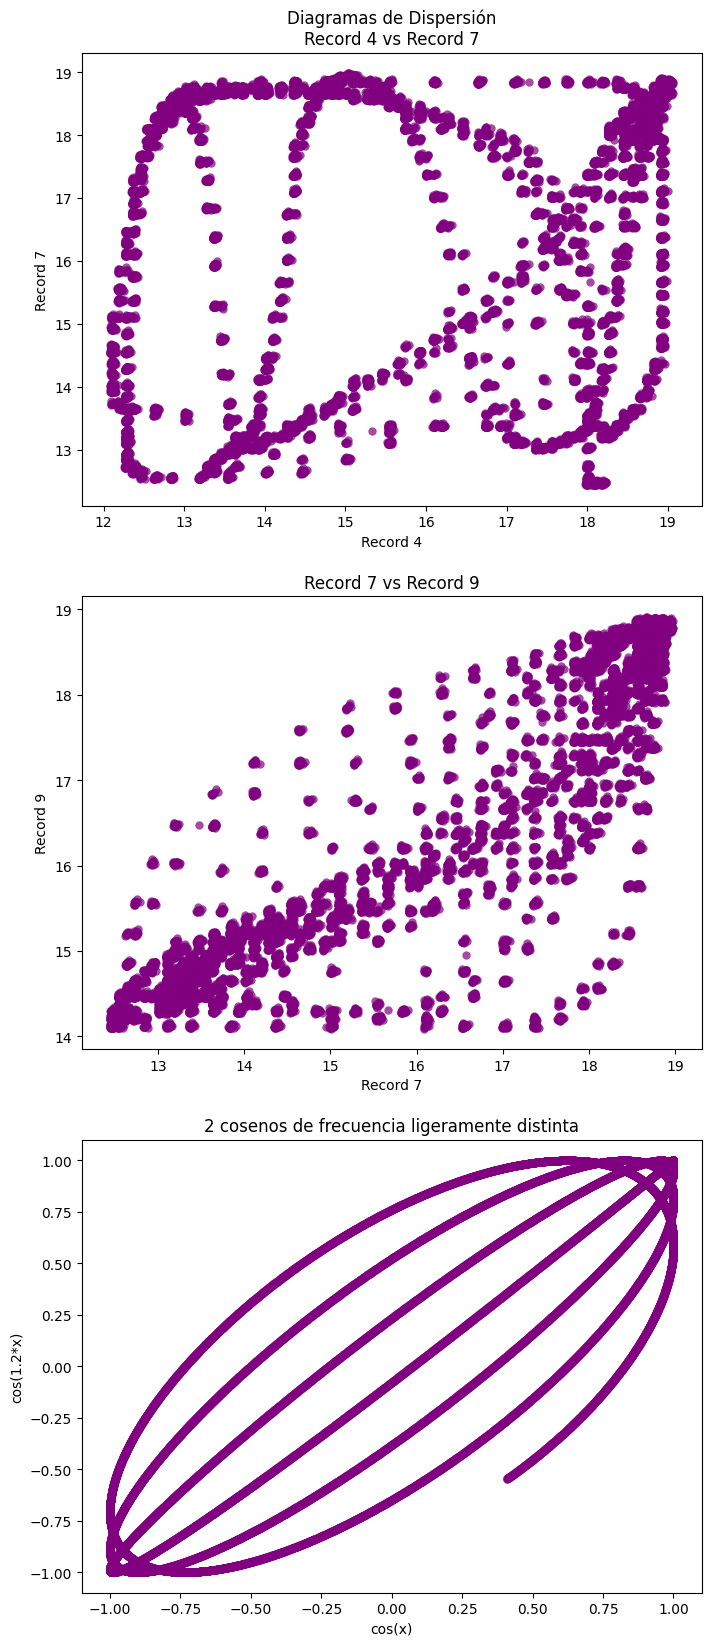

In [18]:
from scipy.stats import pearsonr
from scipy.signal import correlate

cos1=np.cos(t)
cos2=np.cos(1.05*t)

plt.figure(figsize=(8,20))
plt.subplot(311)
plt.scatter(signal4, signal7, color='purple', alpha=0.7, linewidths=0.01)
plt.title('Diagramas de Dispersión\nRecord 4 vs Record 7')
plt.xlabel('Record 4')
plt.ylabel('Record 7')

corr_coef_47 = pearsonr(signal4, signal7)
print("Coeficiente de correlación lineal (records 4 y 7):", corr_coef_47[0])
print("Significacion estadistica:", corr_coef_47[1])


plt.subplot(312)
plt.scatter(signal7, signal9, color='purple', alpha=0.7, linewidths=0.01)
plt.title('Record 7 vs Record 9')
plt.xlabel('Record 7')
plt.ylabel('Record 9')

plt.subplot(313)
plt.scatter(cos1, cos2, color='purple', alpha=0.7, linewidths=0.01)
plt.title('2 cosenos de frecuencia ligeramente distinta')
plt.xlabel('cos(x)')
plt.ylabel('cos(1.2*x)')

corr_coef_79 = pearsonr(signal7, signal9)
print("Coeficiente de correlación lineal (records 7 y 9):", corr_coef_79[0])
print("Significacion estadistica:", corr_coef_79[1])



#plt.scatter?

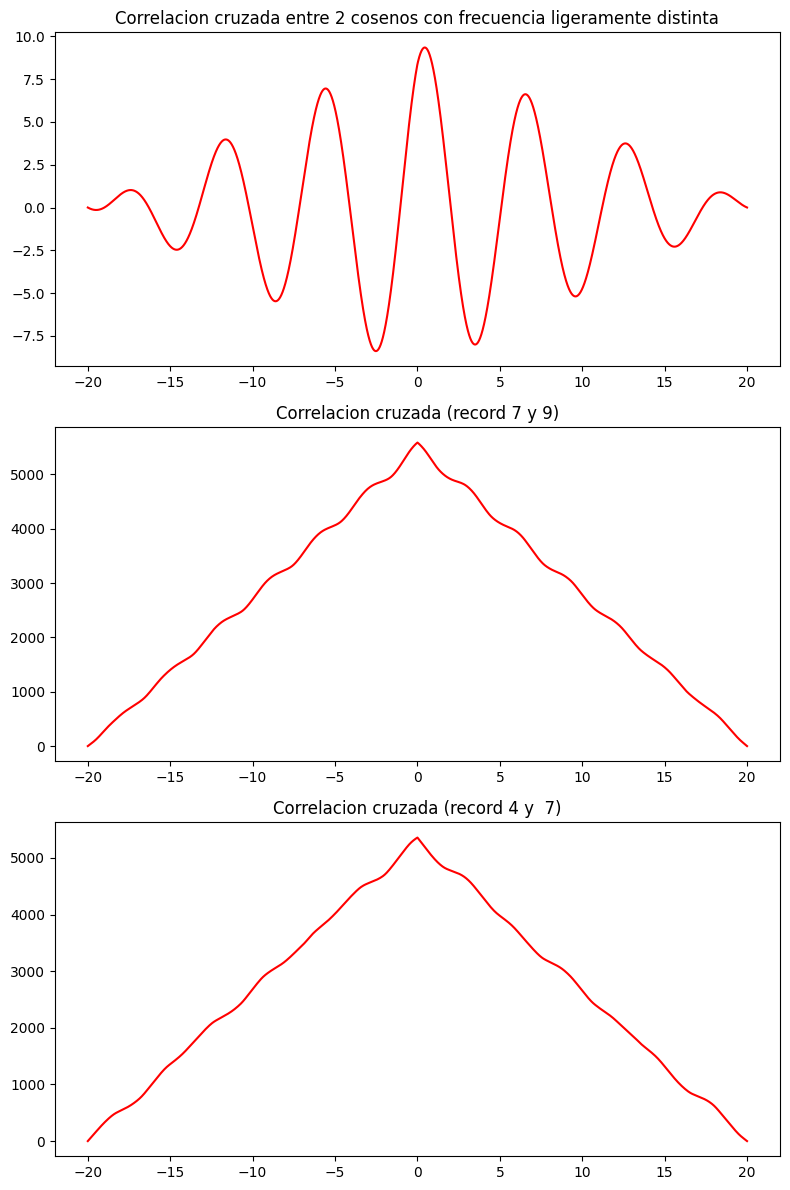

In [19]:

# Correlacion cruzada

#en funcion del valor tao

Tau=sp.correlation_lags(len(signal7), len(signal9))

Rcos12=correlate(cos1, cos2)
#Tau_cos=sp.correlation_lags(len(cos1), len(cos2))

R47 = correlate(signal4, signal7)
#Tau_47=sp.correlation_lags(len(signal4), len(signal7))

R79 = correlate(signal7, signal9)

plt.figure(figsize=(8,12))

plt.subplot(311)
plt.plot(Tau*Ts,Rcos12*Ts, 'r')
plt.title('Correlacion cruzada entre 2 cosenos con frecuencia ligeramente distinta')

plt.subplot(313)
plt.plot(Tau*Ts,R47*Ts, 'r')
plt.title('Correlacion cruzada (record 4 y  7)')

plt.subplot(312)
plt.plot(Tau*Ts,R79*Ts, 'r')
plt.title('Correlacion cruzada (record 7 y 9)')

plt.tight_layout()
plt.show()

#correlate?


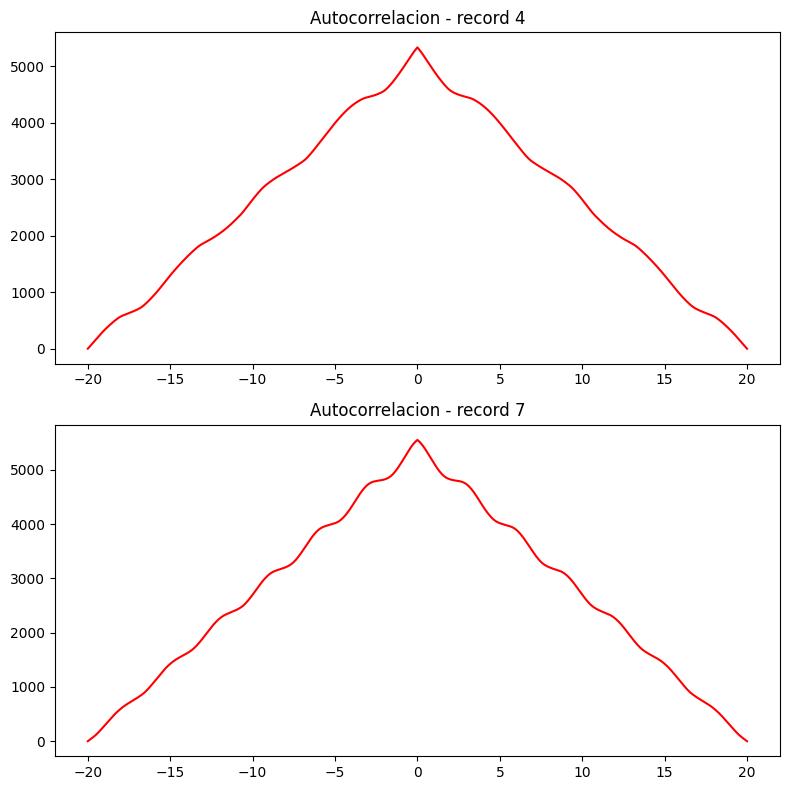

In [20]:
# Autocorrelacion

auto_corr_77 = correlate(signal7, signal7)
auto_corr_44 = correlate(signal4, signal4)
Tau= sp.correlation_lags(len(signal7), len(signal7))

plt.figure(figsize=(8,8))

plt.subplot(211)
plt.plot(Tau*Ts,auto_corr_44*Ts, 'r')
plt.title('Autocorrelacion - record 4')

plt.subplot(212)
plt.plot(Tau*Ts,auto_corr_77*Ts, 'r')
plt.title('Autocorrelacion - record 7')



plt.tight_layout()
plt.show()

**4) PROCESAMIENTO TEMPORAL - ANÁLISIS ESTOCÁSTICO** (0,75 PUNTOS)

En caso de ser factible, construir un **ENSAMBLE** (con la totalidad de las realizaciones) y caracterizarlo a través de su media y desvío estándar: ¿Se puede advertir la presencia de **ESTACIONARIEDAD** del proceso involucrado?¿Y de **ERGODICIDAD**?

**Discutir los resultados obtenidos en cada caso**

In [21]:
#MEDIA DE CADA REALIZACION DEL ENSAMBLE

En=np.array([signal1,signal2,signal3,signal4,signal5,signal6,signal7,signal8,signal9,signal10])

print("Media de las realizaciones E(x_i):", np.mean(E, axis=1))
print("Desvio de las realizaciones V(x_i):", np.std(E, axis=1))
print("Media de las E(x_i): ", np.mean(np.mean(E, axis=1)))
print("Desvío de las E(x_i): ", np.std(np.mean(E, axis=1)))


mu_x=np.mean(En, axis=0)
sigma_x=np.std(En, axis=0)

plt.figure(figsize=(12,6))
plt.plot(t, mu_x, 'b', label='mu(t)')
plt.plot(t, (mu_x+sigma_x), 'r--', alpha=0.7, label='sigma(t)')
plt.plot(t, (mu_x-sigma_x), 'r--', alpha=0.7)
plt.legend()
plt.show()


NameError: ignored

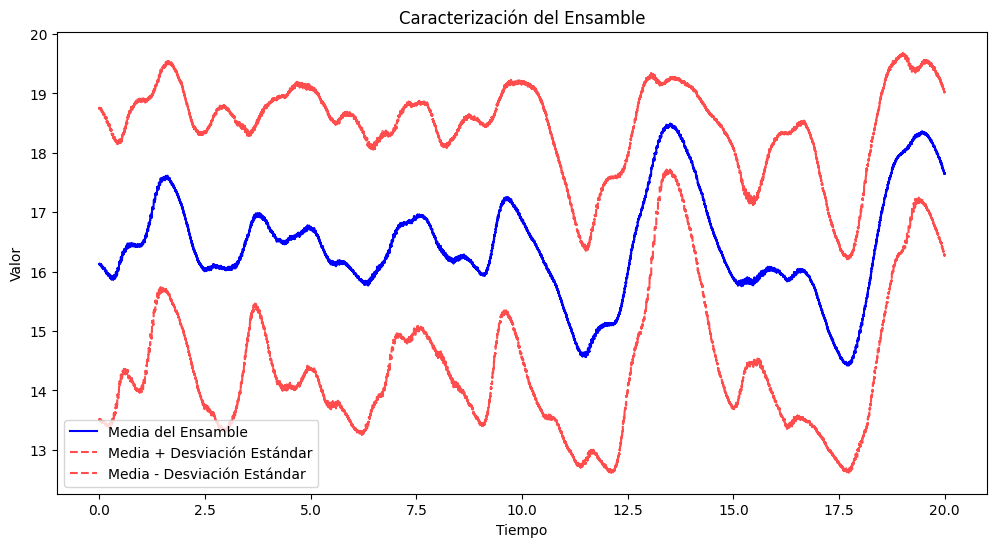

In [28]:
# VERSION 2

# Crear el Ensamble
En = np.array([signal1, signal2, signal3, signal4, signal5, signal6, signal7, signal8, signal9, signal10])

# Calcular la Media y Desviación Estándar del Ensamble
mu_ensamble = np.mean(En, axis=0)
sigma_ensamble = np.std(En, axis=0)

# Visualizar Resultados
t = np.arange(0, timelapse, Ts)

plt.figure(figsize=(12, 6))
plt.plot(t, mu_ensamble, 'b', label='Media del Ensamble')
plt.plot(t, mu_ensamble + sigma_ensamble, 'r--', alpha=0.7, label='Media + Desviación Estándar')
plt.plot(t, mu_ensamble - sigma_ensamble, 'r--', alpha=0.7, label='Media - Desviación Estándar')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Caracterización del Ensamble')
plt.show()


El proceso no es ni estatico ni ergódico, se observa que ninguno de los indicadores estadisticos (media, desvio y potencia) son constantes y ademas las medias de las realizaciones no coinciden entre si por ende tampoco coinciden con la media del ensamble . Tiene sentido que no lo sea, al ser un ensamble de señales cuasiperiodicas. Visto el resultado, tampoco se puede sacar mucho en claro de la media y del desvío del ensamble.

Lo que si resulta interesante es la media de cada realización: 16,45 con un desvío de 0,35. Todas las realizaciones tienen medias muy similares. Esto nos da un indicio de que la potencia promedio tambien puede ser algo en común entre todas las realizaciones.

In [29]:
P_x=POTENCIA(mu_x,20,Ts)

print(P_x)

for i in range(0,9):
  P=POTENCIA(En[i],20,Ts)
  print("Potencia de la realización", i, ": ", P)


270.6557963246964
Potencia de la realización 0 :  291.05031969875847
Potencia de la realización 1 :  282.00004425771806
Potencia de la realización 2 :  285.8455278918745
Potencia de la realización 3 :  266.8803037116515
Potencia de la realización 4 :  275.02898496171736
Potencia de la realización 5 :  249.14690759663554
Potencia de la realización 6 :  277.59157645041614
Potencia de la realización 7 :  262.73667463578784
Potencia de la realización 8 :  282.4063316658444


**5) PROCESAMIENTO TEMPORAL - INTERPOLACIÓN** (1,5 PUNTOS)

Se desea obtener una representación matemática (aproximada) de una de las realizaciones temporales en particular:

*  ¿Qué herramienta podría utilizarse?

La Serie de Fourier
*  ¿Qué suposiciones, a priori, deberían realizarse?

Que la señal sea "periodica", como estamos trabajando con señales reales estas son estocasticas, elegimos una que tenga un comportamiento similar a lo largo del eje temporal y la acotamos para definir un period T.
*  ¿Se podrá evaluar la precisión de dicha aproximación?

Si, se nos ocurre que se puede hacer a través de una correlacion entre la señal original y la SdF obtenida y/o por el error cuadratico medio.

**Llevar a cabo dos aproximaciones distintas (una más precisa que la otra) y analizar los resultados obtenidos**

<ipython-input-30-18a2f1910f53>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,2)


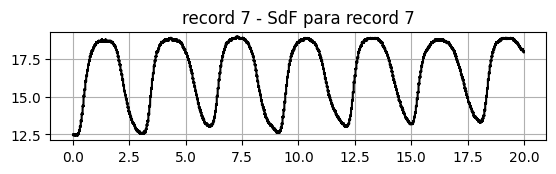

ValueError: ignored

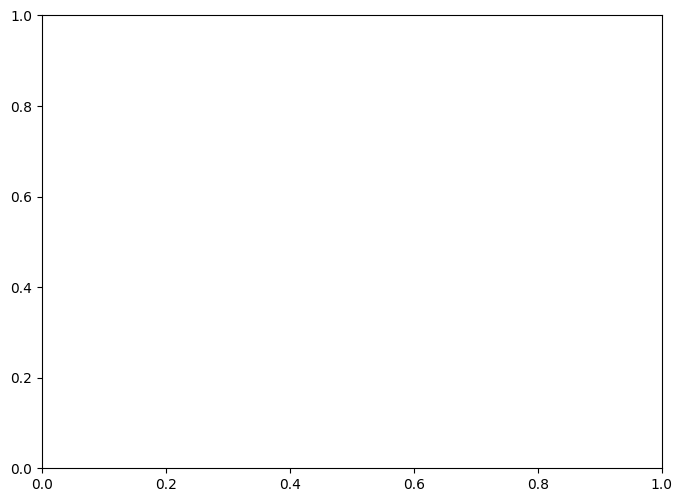

In [30]:
# Vamos a trabajar con record 7
# Serie de Fourier para record 7
from scipy import integrate
ts=00.1
a0,err0= integrate.quad(lambda x: x,-1,1)
T=3                                         # Es una estimacion del periodo
a0=(2/T)*0.5
z=np.arange(0,20,ts)
fig=plt.figure()
N=50                               # Puede variar, depende de cuan aproximado querramos que quede
i=1
while (i<=N):  # DEFINO LOS COEFICIENTES DE LA SERIE
  an,erri=integrate.quad(lambda x:(x)*np.cos(2*i*x*np.pi/T),-T/2,T/2)
  bn,erri=integrate.quad(lambda x:(x)*np.sin(2*i*x*np.pi/T),-T/2,T/2)
  SdF=a0+an*np.cos(i*z*np.pi)+bn*np.sin(i*z*np.pi)
  i=i+1
plt.plot(z,SdF)

#plt.grid()  # los puse como comentario porque los quiero en un mismo grafico
#plt.show()

plt.subplot(3,1,2)
plt.plot(t, signal7, 'k')
plt.title('Record 7')

plt.title("record 7 - SdF para record 7")

plt.grid()
plt.show()

# Diagrama de dispersion para mostrar que tan similares son
plt.figure(figsize=(8,20))
plt.subplot(311)
plt.scatter(signal7, SdF, color='red', alpha=0.7, linewidths=0.01)
plt.title('Diagramas de Dispersión entre record 7 y su SdF')
plt.xlabel('Record 7')
plt.ylabel('SdF')

# Error cuadratico medio (MSE)

MSE=np.square(np.subtract(signal7,SdF)).mean()

# square eleva al cuadrado el resultado de su argumento
# subtract pertenece a la biblioteca numpy y recibe como primer argumento los valores reales a evaluar y luego los valores predichos/approximados para compararlos
# mean calcula la media del resultado de las operaciones anteriores

# Correlacion cruzada entre la señal original y su SdF
R_signal7_SdF=correlate(signal7, SdF)
tau=sp.correlation_lags(len(signal7), len(SdF))
plt.subplot(311)
plt.plot(tau*Ts,R_signal7_SdF*Ts, 'k')
plt.title('Correlacion cruzada entre la señal original y su SdF')
plt.tight_layout()
plt.show()

# aproximacion de explicacion de la señal original a traves de su SdF
r_record7_SdF = pearsonr(signal7, SdF)
R=(r_record7_SdF )**2
s=R*100
print("Coeficiente de correlación lineal (r) entre record7 y su SdF:", r_record7_SdF [0])
print("La SdF puede explicar el",(s), "% de la señal record7")

Coeficiente de correlación lineal (r) entre record7 y su SdF: -0.016138952102544468
La SdF puede explicar el 0.02604657749682245 % de la señal record7


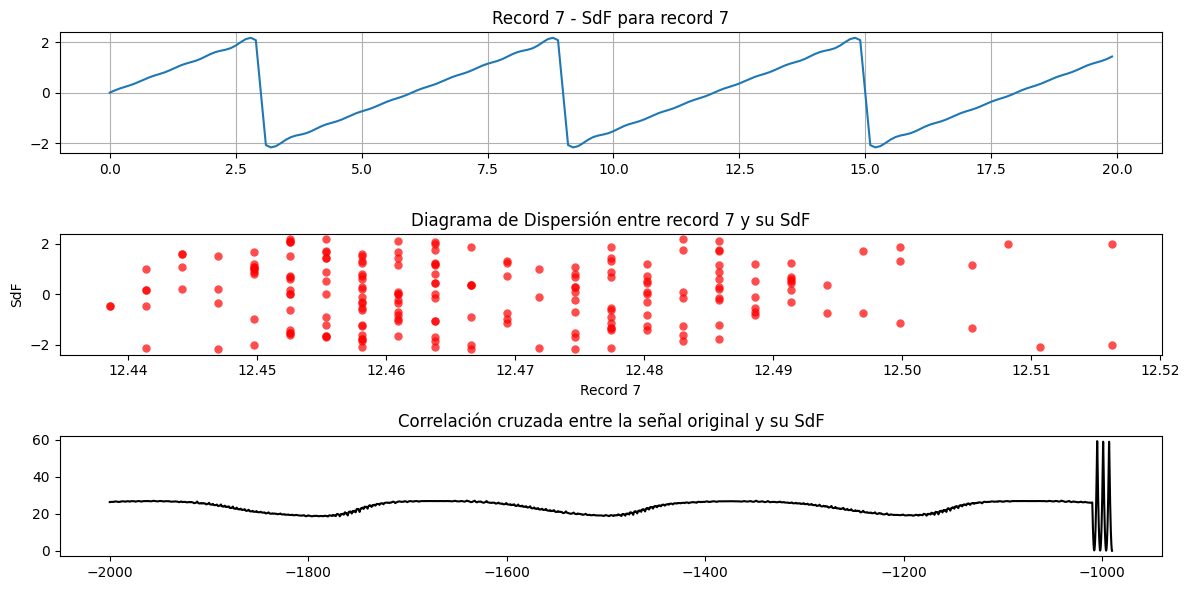

In [42]:
# VERSION 2

from scipy import integrate, correlate
from scipy.stats import pearsonr

# Serie de Fourier para record 7
ts = 0.1
T = 3  # Estimación del periodo
a0, _ = integrate.quad(lambda x: x, -1, 1)
a0 = (2 / T) * a0
z = np.arange(0, 20, ts)

# Calculo de la Serie de Fourier
N = 50
SdF = np.zeros_like(z)
for i in range(1, N + 1):
    an, _ = integrate.quad(lambda x: x * np.cos(2 * i * np.pi * x / T), -T / 2, T / 2)
    bn, _ = integrate.quad(lambda x: x * np.sin(2 * i * np.pi * x / T), -T / 2, T / 2)
    SdF += an * np.cos(i * np.pi * z / T) + bn * np.sin(i * np.pi * z / T)

# Visualización de la Serie de Fourier
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(z, SdF, label='SdF')
plt.title("Record 7 - SdF para record 7")
plt.grid()

# Diagrama de dispersión
plt.subplot(3, 1, 2)
min_length = min(len(signal7), len(SdF))
plt.scatter(signal7[:min_length], SdF[:min_length], color='red', alpha=0.7, linewidths=0.01)
plt.title('Diagrama de Dispersión entre record 7 y su SdF')
plt.xlabel('Record 7')
plt.ylabel('SdF')

# Correlacion cruzada entre la señal original y su SdF
R_signal7_SdF = np.correlate(signal7, SdF, mode='full')  # Asegurémonos de que el modo sea 'full'
tau = np.arange(-len(signal7) + 1, len(signal7)) * ts
R_signal7_SdF = R_signal7_SdF[len(R_signal7_SdF)//2:]  # Tomamos solo la mitad del array

plt.subplot(3, 1, 3)
plt.plot(tau[:len(R_signal7_SdF)], R_signal7_SdF * ts, 'k')  # Multiplicamos por ts para ajustar la escala
plt.title('Correlación cruzada entre la señal original y su SdF')
plt.tight_layout()

# Aproximación de explicación de la señal original a través de su SdF
min_length = min(len(signal7), len(SdF))
r_record7_SdF = pearsonr(signal7[:min_length], SdF[:min_length])
R = r_record7_SdF[0] ** 2
s = R * 100
print("Coeficiente de correlación lineal (r) entre record7 y su SdF:", r_record7_SdF[0])
print("La SdF puede explicar el", s, "% de la señal record7")

plt.tight_layout()
plt.show()


In [40]:
min_length = min(len(signal7), len(SdF))
r_record7_SdF = pearsonr(signal7[:min_length], SdF[:min_length])


**6) PROCESAMIENTO TEMPORAL - SISTEMAS LIT Y SEÑALES ESTOCÁSTICAS** (0,75 PUNTOS)

Se desean eliminar las variaciones rápidas de alguna de las series temporales bajo estudio. Proponer un **SISTEMA LIT** que pueda realizar dicha operación y  obtener el resultado aplicando la **operación de CONVOLUCIÓN**.

**¿Cómo podría evaluarse cuantitativamente el efecto obtenido?** (Ayuda: Efectuar el análisis en el dominio de la frecuencia, analizando la relación armónica a armónica)

ValueError: ignored

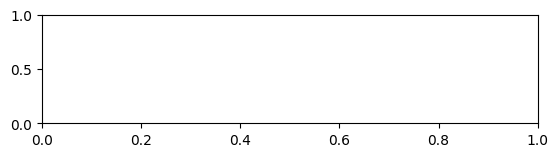

In [43]:
u = lambda t: np.piecewise(t, t>=0, [1,0])

t=np.arange(0,20,ts)

#Definición de la señal de entrada x(t) y la respuesta impulsional del sistema h(t)
h=2*np.exp(-2*t)*u(t)


#Definición del tiempo para la convolución y(t)


tc=np.arange(0,20,ts)

#CONVOLUCIÓN
y=np.convolve(signal7,h)*ts


plt.subplot(311)
plt.plot(t,signal9,'b', label= "xitacion (record9)")
plt.legend()
plt.xlim([0,20])
plt.ylim([13,19])
plt.xlabel("???????")     # QUE ESTAMOS GRAFICANDO???????

plt.subplot(312)
plt.plot(t,h,'r', label= 'respuesta al impulso h(t)')
plt.legend()
plt.xlim([-3,5])
plt.ylim([0,2.1])
plt.xlabel('????????')     # QUE ESTAMOS GRAFICANDO???????


plt.subplot(313)
plt.plot(tc[:-1],y,'g', label= 'convolucion y(t)')
plt.xlim([-3,5])
plt.ylim([0,1.1])
plt.legend()
plt.xlabel('????????????')      # QUE ESTAMOS GRAFICANDO???????

plt.show()


# POR SIMPLE CURIOSIDAD: COMO REACCIONARIA LA SdF A UNA CONVOLUCION?

ySdF=np.convolve(SdF,h)*ts


plt.subplot(311)
plt.plot(t,SdF,'b', label= "exitacion (SdF)")
plt.legend()
plt.xlim([0,20])
plt.ylim([13,19])
plt.xlabel("???????")     # QUE ESTAMOS GRAFICANDO???????

plt.subplot(312)
plt.plot(t,h,'r', label= 'respuesta al impulso h(t)')
plt.legend()
plt.xlim([-3,5])
plt.ylim([0,2.1])
plt.xlabel('????????')     # QUE ESTAMOS GRAFICANDO???????


plt.subplot(313)
plt.plot(tc[:-1],y,'g', label= 'convolucion ySdF(t)')
plt.xlim([-3,5])
plt.ylim([13,19])
plt.legend()
plt.xlabel('????????????')      # QUE ESTAMOS GRAFICANDO???????

plt.show()





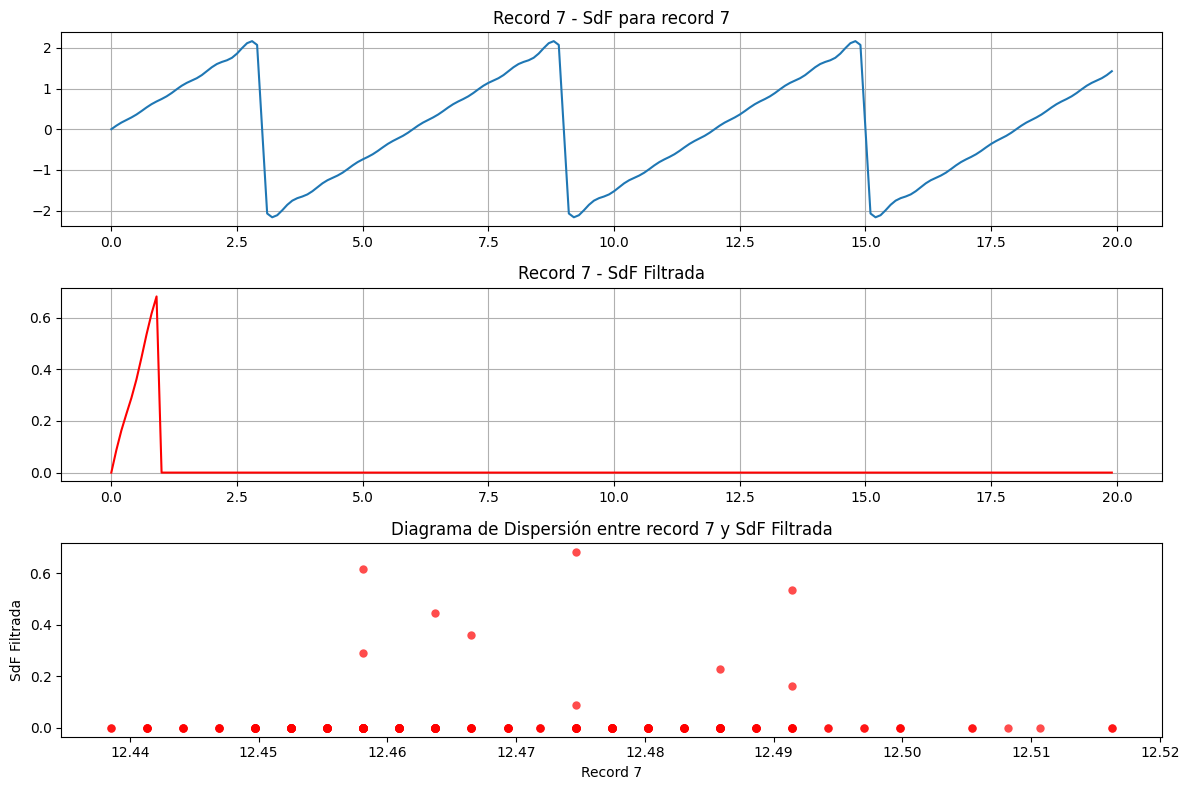

In [44]:
# VERSION 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Serie de Fourier para record 7
ts = 0.1
T = 3  # Estimación del periodo
a0, _ = integrate.quad(lambda x: x, -1, 1)
a0 = (2 / T) * a0
z = np.arange(0, 20, ts)

# Calculo de la Serie de Fourier
N = 50
SdF = np.zeros_like(z)
for i in range(1, N + 1):
    an, _ = integrate.quad(lambda x: x * np.cos(2 * i * np.pi * x / T), -T / 2, T / 2)
    bn, _ = integrate.quad(lambda x: x * np.sin(2 * i * np.pi * x / T), -T / 2, T / 2)
    SdF += an * np.cos(i * np.pi * z / T) + bn * np.sin(i * np.pi * z / T)

# Aplicar un filtro pasa bajos en el dominio de la frecuencia para eliminar variaciones rápidas
cutoff_frequency = 10  # Frecuencia de corte del filtro pasa bajos
SdF_filtered = np.copy(SdF)
SdF_filtered[cutoff_frequency:] = 0  # Atenuar frecuencias superiores a la frecuencia de corte

# Visualización de la Serie de Fourier y su versión filtrada
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(z, SdF, label='SdF')
plt.title("Record 7 - SdF para record 7")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(z, SdF_filtered, label='SdF Filtrada', color='red')
plt.title("Record 7 - SdF Filtrada")
plt.grid()

# Diagrama de dispersión entre la señal original y su SdF filtrada
plt.subplot(3, 1, 3)
min_length = min(len(signal7), len(SdF_filtered))
plt.scatter(signal7[:min_length], SdF_filtered[:min_length], color='red', alpha=0.7, linewidths=0.01)
plt.title('Diagrama de Dispersión entre record 7 y SdF Filtrada')
plt.xlabel('Record 7')
plt.ylabel('SdF Filtrada')

plt.tight_layout()
plt.show()



**7) OPCIONAL - VÍNCULO CON INVESTIGACIÓN Y DESARROLLO (VALORACIÓN EXTRA)**

*  Citar dos artículos científicos relacionados con el tópico de trabajo seleccionado, describiendo brevemente el objetivo de cada trabajo y los resultados obtenidos (Copiar Título, Autores y Abstract).
*  ¿Tiene conocimiento acerca de grupos/proyectos en UTN.BA que se dediquen a dicho tópico?¿Han publicado acerca de ello?
*  ¿Qué utilidad práctica podrían tener las operaciones realizadas anteriormente en relación  con la naturaleza de las señales seleccionadas?¿Exsite algún trabajo científico que las haya utilizado?
*  ¿Qué tipo de equipamiento sería necesario para adquirir el tipo de las señales mencionadas?¿Se encuentra en la facultad?¿Podría construirse?


*NOTA: Para llevar a cabo esta sección se recomienda utilizar el contenido del panel "I+D en UTN.BA" dispuesto en el campus virtual*

In [ ]:

np.fromfile()

